<a href="https://colab.research.google.com/github/PhamTuThanh/Khai_Pha_Du_Lieu/blob/master/SVM_vs_Naive%20Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
blood_transfusion_service_center = fetch_ucirepo(id=176)

# data (as pandas dataframes)
X = blood_transfusion_service_center.data.features
y = blood_transfusion_service_center.data.targets
# metadata
print(blood_transfusion_service_center.metadata)

# variable information
print(blood_transfusion_service_center.variables)


{'uci_id': 176, 'name': 'Blood Transfusion Service Center', 'repository_url': 'https://archive.ics.uci.edu/dataset/176/blood+transfusion+service+center', 'data_url': 'https://archive.ics.uci.edu/static/public/176/data.csv', 'abstract': 'Data taken from the Blood Transfusion Service Center in Hsin-Chu City in Taiwan -- this is a classification problem. ', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 748, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Donated_Blood'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C5GS39', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 434, 'type': 'NATIVE', 'title': 'Knowledge discovery on RFM model using Bernoulli sequence', 'authors': 'I. Yeh, K. Yang, Tao-Ming Ting', 'venue': 'Expert systems with applications', 'year': 2009, 'journa

In [4]:
y = y.values.ravel()
print(X)
print(y)

     Recency  Frequency  Monetary  Time
0          2         50     12500    98
1          0         13      3250    28
2          1         16      4000    35
3          2         20      5000    45
4          1         24      6000    77
..       ...        ...       ...   ...
743       23          2       500    38
744       21          2       500    52
745       23          3       750    62
746       39          1       250    39
747       72          1       250    72

[748 rows x 4 columns]
[1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1
 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0
 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import time
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Hàm để vẽ learning curve
def plot_learning_curve(model, X_train, y_train, X_test, y_test, model_name):
    train_accuracies = []
    test_accuracies = []

    # Lặp qua các bước huấn luyện với các kích thước mẫu tăng dần
    for i in range(1, len(X_train) + 1):
        model.fit(X_train[:i], y_train[:i])  # Huấn luyện với i mẫu đầu tiên
        train_pred = model.predict(X_train[:i])
        test_pred = model.predict(X_test)

        # Tính độ chính xác
        train_accuracies.append(accuracy_score(y_train[:i], train_pred))
        test_accuracies.append(accuracy_score(y_test, test_pred))

    # Vẽ biểu đồ learning curve
    plt.plot(range(1, len(X_train) + 1), train_accuracies, label=f'Train {model_name}')
    plt.plot(range(1, len(X_train) + 1), test_accuracies, label=f'Test {model_name}')
    plt.title(f'Learning Curve: {model_name}')
    plt.xlabel('Number of Training Samples')
    plt.ylabel('Accuracy')
    plt.legend()

In [7]:
# Huấn luyện mô hình SVM
start_time = time.time()
svm_model = SVC(kernel='linear')  # Bạn có thể thay đổi kernel nếu muốn
svm_model.fit(X_train, y_train)
svm_time = time.time() - start_time

# Dự đoán và tính độ chính xác của SVM
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

In [8]:
# Huấn luyện mô hình Naive Bayes
start_time = time.time()
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_time = time.time() - start_time

# Dự đoán và tính độ chính xác của Naive Bayes
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)

In [9]:
# In kết quả độ chính xác
print(f'Accuracy of SVM: {svm_accuracy:.4f}')
print(f'Accuracy of Naive Bayes: {nb_accuracy:.4f}')

Accuracy of SVM: 0.7600
Accuracy of Naive Bayes: 0.7533


In [10]:
# Tạo bảng so sánh
comparison = pd.DataFrame({
    'Model': ['SVM', 'Naive Bayes'],
    'Accuracy': [svm_accuracy, nb_accuracy],
    'Training Time (seconds)': [svm_time, nb_time]
})

# Vẽ bảng so sánh
print(comparison)

         Model  Accuracy  Training Time (seconds)
0          SVM  0.760000               356.117538
1  Naive Bayes  0.753333                 0.004274


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Hàm tính toán các chỉ số
def calculate_metrics(model, X_test, y_test):
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    return accuracy, precision, recall, f1

In [12]:
# Tính toán các chỉ số cho SVM
svm_accuracy, svm_precision, svm_recall, svm_f1 = calculate_metrics(svm_model, X_test, y_test)

# Tính toán các chỉ số cho Naive Bayes
nb_accuracy, nb_precision, nb_recall, nb_f1 = calculate_metrics(nb_model, X_test, y_test)

         Model  Accuracy  Precision    Recall  F1-Score
0          SVM  0.760000   0.538462  0.189189  0.280000
1  Naive Bayes  0.753333   0.500000  0.162162  0.244898


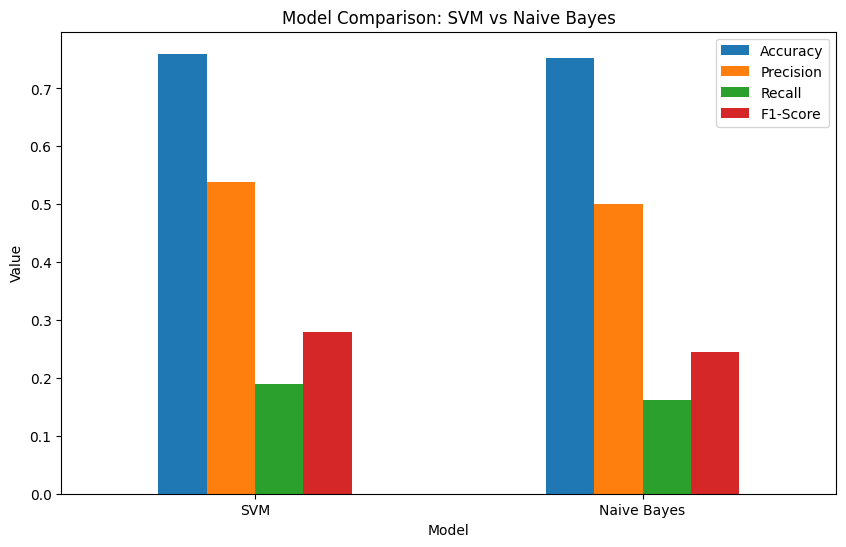

In [13]:
# Tạo bảng so sánh
comparison = pd.DataFrame({
    'Model': ['SVM', 'Naive Bayes'],
    'Accuracy': [svm_accuracy, nb_accuracy],
    'Precision': [svm_precision, nb_precision],
    'Recall': [svm_recall, nb_recall],
    'F1-Score': [svm_f1, nb_f1],
})

# Vẽ bảng so sánh
print(comparison)

# Vẽ biểu đồ so sánh
comparison.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison: SVM vs Naive Bayes')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.show()